<a href="https://colab.research.google.com/github/LifnaJos/ADC601-Data-Analytics-Visualization/blob/main/M3_DAV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis using Python

Courtesy for Time Series Analysis using ARIMA Model :
* https://www.kaggle.com/code/ahmadjalalmasood123/time-series-analysis-using-arima-model
* https://www.youtube.com/watch?v=e8Yw4alG16Q
* https://www.kaggle.com/code/lejcruz/time-series-analysis-python
* https://www.youtube.com/playlist?list=PLqYFiz7NM_SMC4ZgXplbreXlRY4Jf4zBP

Courtesy for Dataset - [Air Passengers.csv (Kaggle)](https://www.kaggle.com/datasets/rakannimer/air-passengers?resource=download)

## Step - 1 : Importing Python Packages, Loading Data and Displaying the top 5 and last 5 rows

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
rcParams['figure.figsize']=10,6

In [ ]:
dataset = pd. read_csv("AirPassengers.csv")
dataset.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [ ]:
# Parse strings to datatime type
dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format=True)
indexedDataset = dataset.set_index(['Month'])

In [ ]:
indexedDataset.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
indexedDataset.tail(5)

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


## Step - 2 : Plotting the raw data

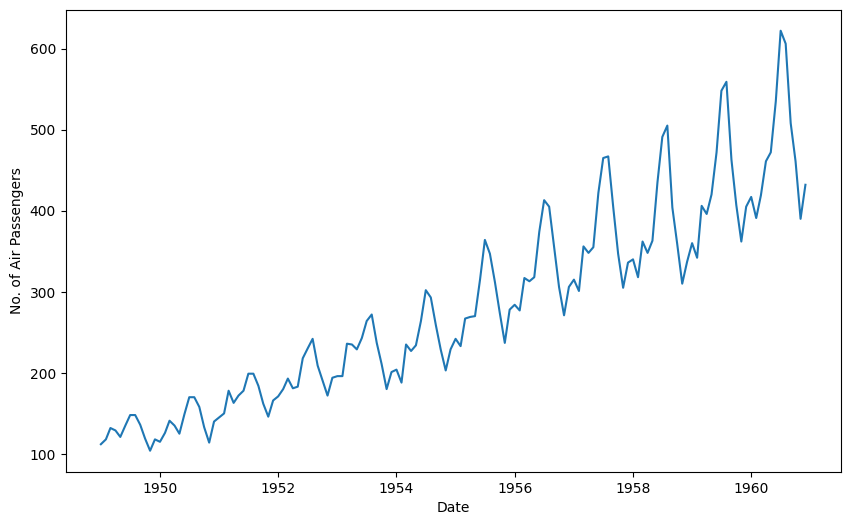

In [ ]:
# Plot graph
plt.xlabel("Date")
plt.ylabel("No. of Air Passengers")
plt.plot(indexedDataset)

## Step - 3 : Check the stationarity of raw data

### a. Using Rolling Statistics

In [ ]:
# Detecting Stationarity using Rolling Statistics
# As the mean is not constant, That
# rolling mean at yearly level
rollmean = indexedDataset.rolling(window=12).mean()
# rolling std at yearly level
rollstd = indexedDataset.rolling(window=12).std()
print(rollmean, rollstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


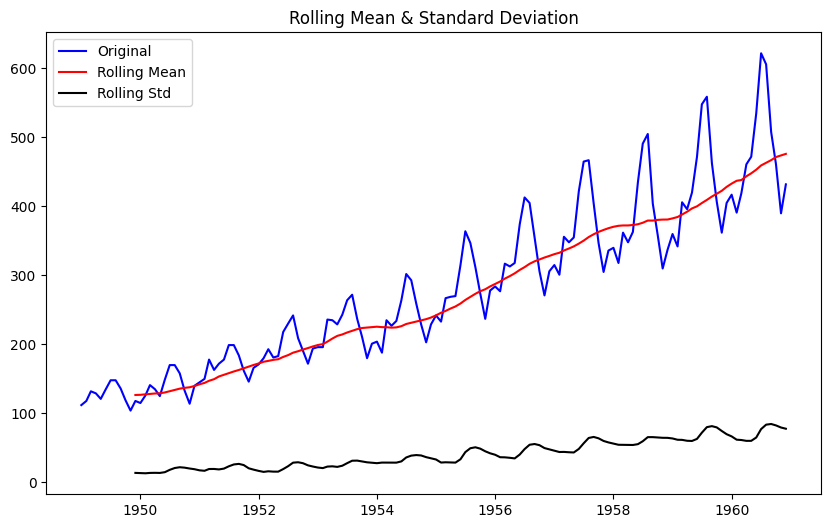

In [ ]:
# Plot rolling statistics
orig = plt.plot(indexedDataset, color = 'blue', label = "Original")
mean = plt.plot(rollmean, color = 'red', label = "Rolling Mean")
std = plt.plot(rollstd, color = 'black', label = "Rolling Std")
plt.legend(loc = "best")
plt.title("Rolling Mean & Standard Deviation")
plt.show()

### b. Using Augmented Dicky-Fuller (ADF) Test

In [ ]:
# Perform Dicky-Fuller Test
#import statsmodels.tsa.stattools
from statsmodels.tsa.stattools import adfuller
print("Results of Dickey Fuller Test")
# Here AIC helps to analyse the exact value from actual values and difference between them
dftest = adfuller(indexedDataset['#Passengers'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','#Lags used','No. of observations used'])
for key, value in dftest[4].items():
  dfoutput['Critical value (%s)'%key]= value

print(dfoutput)

Results of Dickey Fuller Test
Test statistic                0.815369
p-value                       0.991880
#Lags used                   13.000000
No. of observations used    130.000000
Critical value (1%)          -3.481682
Critical value (5%)          -2.884042
Critical value (10%)         -2.578770
dtype: float64


### c. test_stationarity()

 - Returns Plotting of Rolling Statistics
 - Test Statistics of Augmented Dicky-Fuller (ADF) test

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeSeries):
  # Determinig Rolling statistics
  movingaverage = timeSeries.rolling(window=12).mean()
  movingSTD = timeSeries.rolling(window=12).std()

  # Plot rolling statistics
  orig = plt.plot(timeSeries, color = 'blue', label = "Original")
  mean = plt.plot(movingaverage, color = 'red', label = "Rolling Mean")
  std = plt.plot(movingSTD, color = 'black', label = "Rolling Std")
  plt.legend(loc = "best")
  plt.title("Rolling Mean & Standard Deviation")
  plt.show()

  # Perform Dickey-Fuller Test
  print("Results of Dickey Fuller Test")
  dftest = adfuller(timeSeries['#Passengers'], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4],index=['Test statistic','p-value','#Lags used','No. of observations used'])
  for key, value in dftest[4].items():
    dfoutput['Critical value (%s)'%key]= value
  print(dfoutput)

## Step - 4 : Perform transformation to incorporate stationarity

#### Applying LogSCale to Raw Data

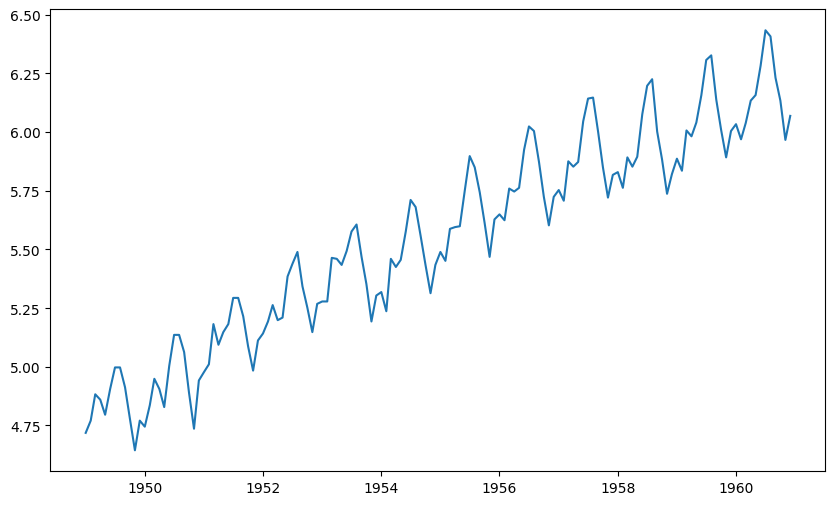

In [ ]:
# Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

***Observation*** : When plotted, the scale changes as raw data is transformed to Logarithmic Scale

### Transformation - 1 : Subtracting Moving Average from LogScale Data

#### 1(a) : Computation

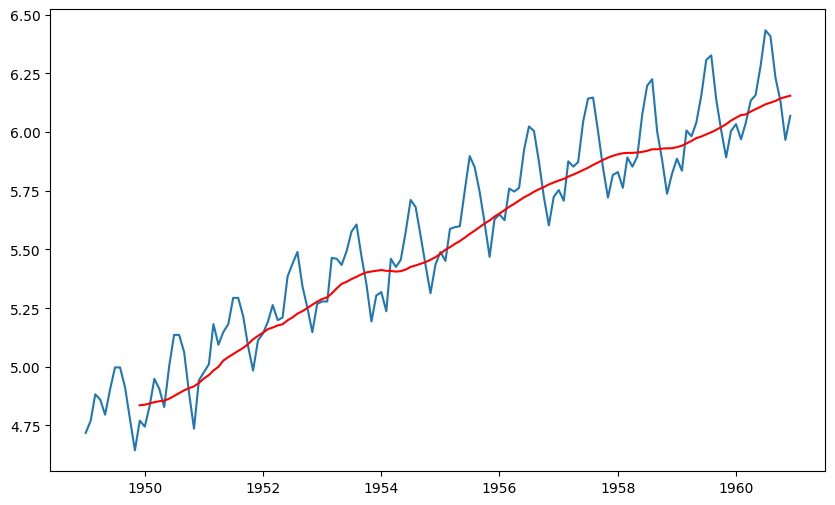

In [ ]:
movingaverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingaverage, color='red')
#plt.plot(movingSTD, color='black')

In [ ]:
dataLogScaleMinusMovingAverage = indexedDataset_logScale - movingaverage
dataLogScaleMinusMovingAverage.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [ ]:
#Remove NaN values
dataLogScaleMinusMovingAverage.dropna(inplace=True)
dataLogScaleMinusMovingAverage.head(18)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


#### 1(b) : Plotting

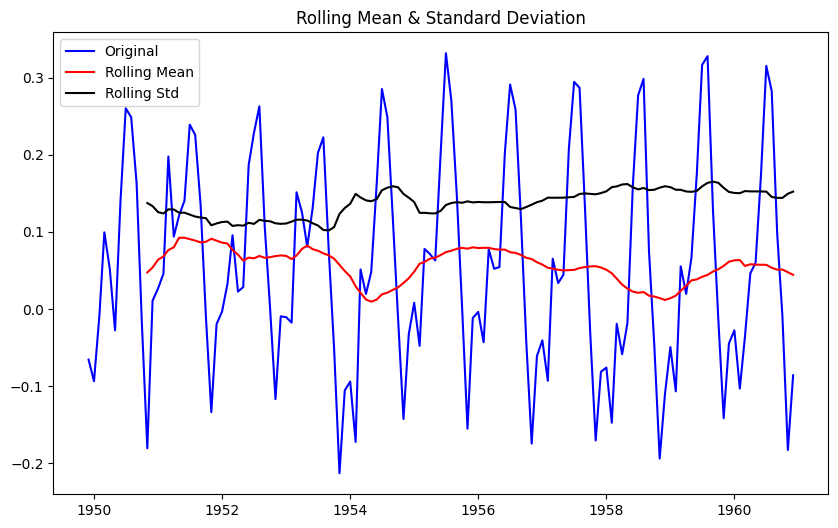

Results of Dickey Fuller Test
Test statistic               -3.162908
p-value                       0.022235
#Lags used                   13.000000
No. of observations used    119.000000
Critical value (1%)          -3.486535
Critical value (5%)          -2.886151
Critical value (10%)         -2.579896
dtype: float64


In [ ]:
test_stationarity(dataLogScaleMinusMovingAverage)

Note :
* Test statistics & Critical values are almost equal. This helps to understand whether your data is stationary or not.
* p-value is almost nearer to 0


### Transformation - 2 : Subtrating Exponential Decay Weighted Average from LogScale Data

#### 2(a) : Computation

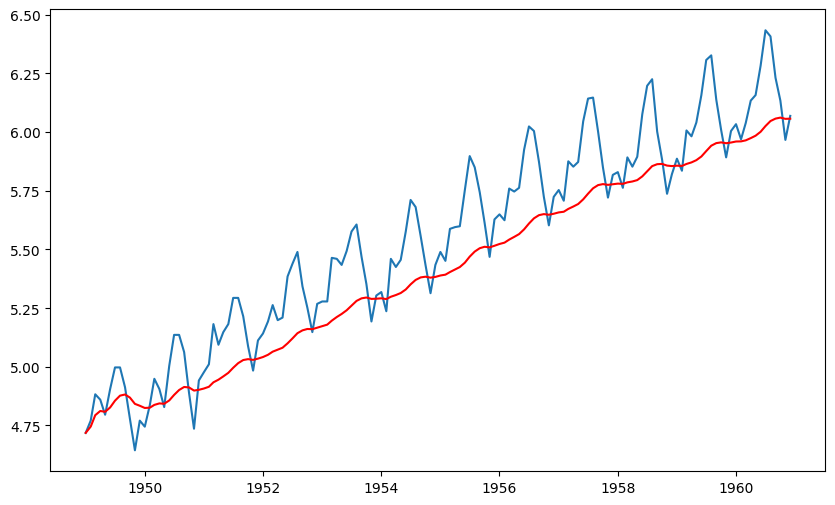

In [ ]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12,min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

As the time series progresses, the average is also progessing to higher side

In [ ]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage

#### 2(c) :  Plotting

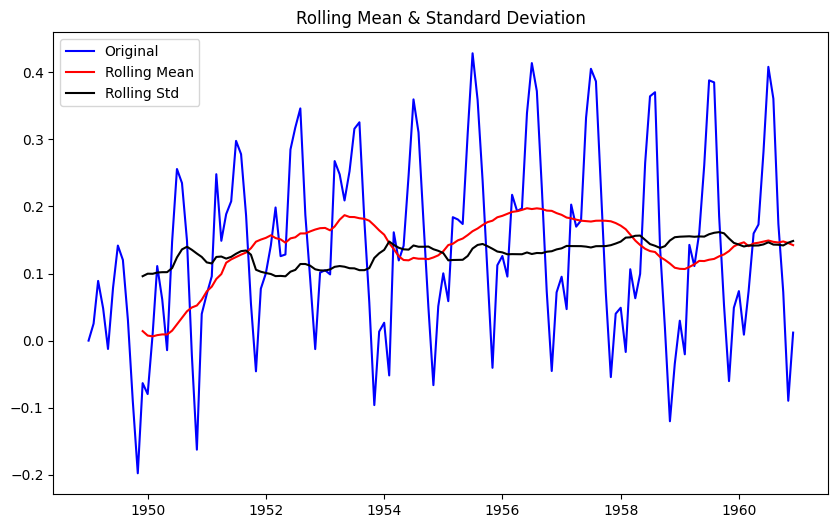

Results of Dickey Fuller Test
Test statistic               -3.601262
p-value                       0.005737
#Lags used                   13.000000
No. of observations used    130.000000
Critical value (1%)          -3.481682
Critical value (5%)          -2.884042
Critical value (10%)         -2.578770
dtype: float64


In [ ]:
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

* The std deviation is almost flat. That means there is no trend.
* Rolling mean better than previous results.
* p value is nearing 0 ==> time series stationary.

## Step - 5 : Understanding the **Components** of Time Series

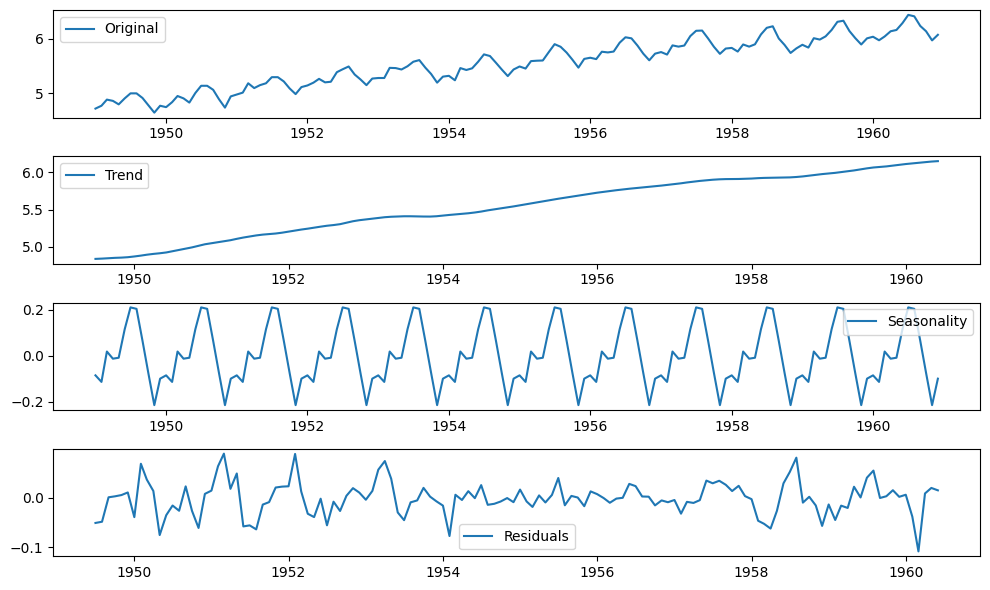

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(indexedDataset_logScale, label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

* It shows a positive trend
* Depicts the seasonality component in the dataset
* Depicts the irregularity /  residuals present in the data

## Step - 6 : Check whether the noise is stationary or not

In [ ]:
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
print(decomposedLogData)

Month
1949-07-01   -0.050884
1949-08-01   -0.048415
1949-09-01    0.001223
1949-10-01    0.003156
1949-11-01    0.005749
                ...   
1960-02-01   -0.038032
1960-03-01   -0.108624
1960-04-01    0.009006
1960-05-01    0.020213
1960-06-01    0.015348
Name: resid, Length: 132, dtype: float64


In [ ]:
decomposedLogData.describe()

count    132.000000
mean      -0.000866
std        0.033505
min       -0.108624
25%       -0.015421
50%       -0.000013
75%        0.015892
max        0.089858
Name: resid, dtype: float64

In [ ]:
decomposedLogData.head(12)

Month
1949-07-01   -0.050884
1949-08-01   -0.048415
1949-09-01    0.001223
1949-10-01    0.003156
1949-11-01    0.005749
1949-12-01    0.011045
1950-01-01   -0.039093
1950-02-01    0.069306
1950-03-01    0.037236
1950-04-01    0.014028
1950-05-01   -0.075473
1950-06-01   -0.035148
Name: resid, dtype: float64

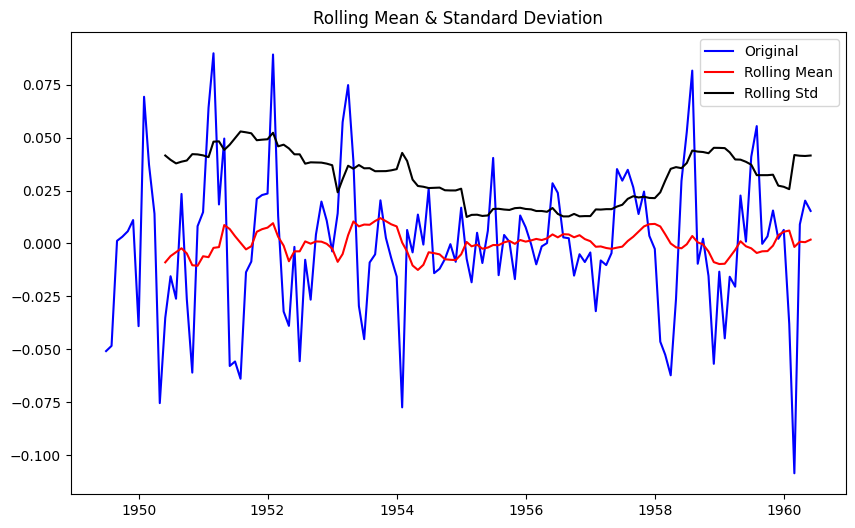

Results of Dickey Fuller Test


KeyError: '#Passengers'

In [ ]:
test_stationarity(decomposedLogData)

Observation : The residuals are not stationary.

## Step - 7 : Implement the AR Model

### 7(a) : Plot the ACF and PACF graphs
- for LogScale Data from whihc Exponential Decay Weighted Average is subtracted

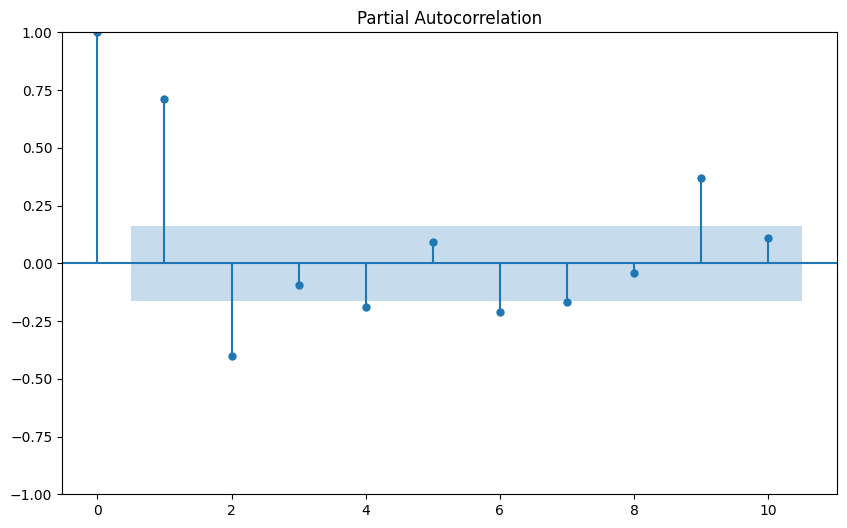

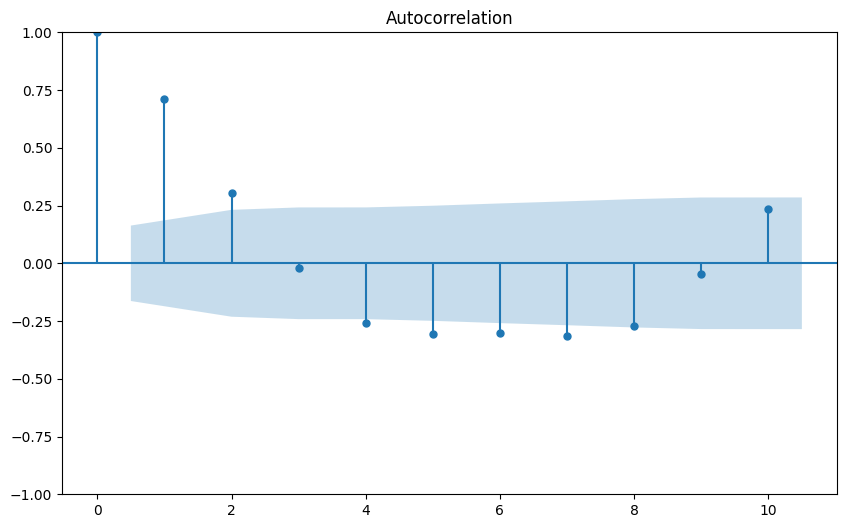

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf=plot_pacf(datasetLogScaleMinusMovingExponentialDecayAverage,lags=10)
acf=plot_acf(datasetLogScaleMinusMovingExponentialDecayAverage,lags=10)

### 7(b) : Split the LogScale Data for Training & Testing
- Training with 7 years data
- Testing with 5 years data

In [ ]:
train=datasetLogScaleMinusMovingExponentialDecayAverage[:len(datasetLogScaleMinusMovingExponentialDecayAverage)-60]
test=datasetLogScaleMinusMovingExponentialDecayAverage[len(datasetLogScaleMinusMovingExponentialDecayAverage)-60:]

### 7(c) : Train the AR Model

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
# AR Model with p = 2 from PACF plot
model_1 = AutoReg(train, lags=1).fit()

In [ ]:
print(model_1.summary())

                            AutoReg Model Results                             
Dep. Variable:            #Passengers   No. Observations:                   84
Model:                     AutoReg(1)   Log Likelihood                  81.184
Method:               Conditional MLE   S.D. of innovations              0.091
Date:                Mon, 18 Mar 2024   AIC                           -156.369
Time:                        05:59:58   BIC                           -149.112
Sample:                    02-01-1949   HQIC                          -153.454
                         - 12-01-1955                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0388      0.014      2.794      0.005       0.012       0.066
#Passengers.L1     0.6985      0.078      8.992      0.000       0.546       0.851
                                    

Observation : Lower the p value, more significant that time lag

In [ ]:
# Experimenting with lag = 10
# model_2 = AutoReg(train, lags=10).fit()
#print(model_2.summary())

### 7(d) : Test the AR Model

In [ ]:
pred=model_1.predict(start=len(train),end=len(datasetLogScaleMinusMovingExponentialDecayAverage)-1, dynamic=False)

In [ ]:
print(len(train))

84


In [ ]:
print(pred)

1956-01-01    0.117250
1956-02-01    0.120697
1956-03-01    0.123104
1956-04-01    0.124786
1956-05-01    0.125960
1956-06-01    0.126781
1956-07-01    0.127354
1956-08-01    0.127754
1956-09-01    0.128034
1956-10-01    0.128229
1956-11-01    0.128365
1956-12-01    0.128461
1957-01-01    0.128527
1957-02-01    0.128574
1957-03-01    0.128606
1957-04-01    0.128629
1957-05-01    0.128645
1957-06-01    0.128656
1957-07-01    0.128664
1957-08-01    0.128669
1957-09-01    0.128673
1957-10-01    0.128675
1957-11-01    0.128677
1957-12-01    0.128678
1958-01-01    0.128679
1958-02-01    0.128680
1958-03-01    0.128680
1958-04-01    0.128681
1958-05-01    0.128681
1958-06-01    0.128681
1958-07-01    0.128681
1958-08-01    0.128681
1958-09-01    0.128681
1958-10-01    0.128681
1958-11-01    0.128681
1958-12-01    0.128681
1959-01-01    0.128681
1959-02-01    0.128681
1959-03-01    0.128681
1959-04-01    0.128681
1959-05-01    0.128681
1959-06-01    0.128681
1959-07-01    0.128681
1959-08-01 

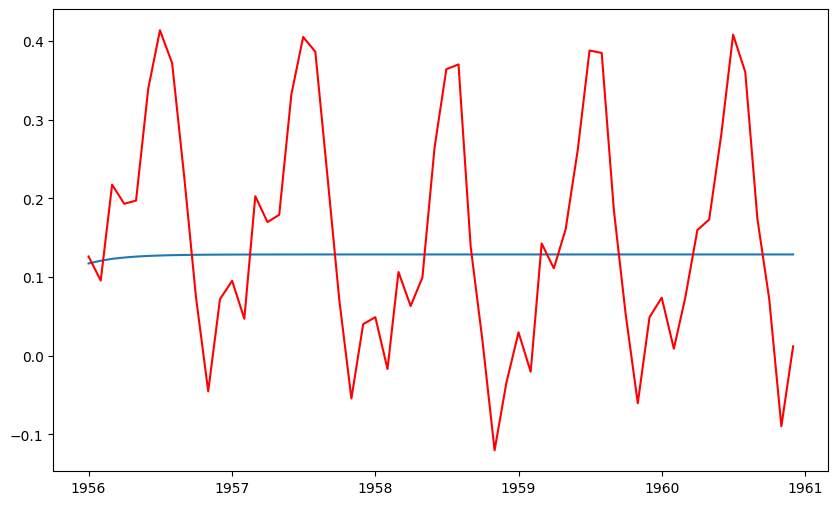

In [ ]:
plt.plot(pred)
plt.plot(test, color='red')

### 7(e) : Calculate the Error

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(test,pred))
print(rmse)

0.606250375763784


### 7(f) : Making future predictions

In [ ]:
pred_future=model_1.predict(start=len(datasetLogScaleMinusMovingExponentialDecayAverage)+1, end=len(datasetLogScaleMinusMovingExponentialDecayAverage)+60, dynamic=False)
print("Prediction for next 5 years")
print(pred_future)
print("No. of predictions : \t", len(pred_future))

Prediction for next 5 years
1961-02-01    0.128681
1961-03-01    0.128681
1961-04-01    0.128681
1961-05-01    0.128681
1961-06-01    0.128681
1961-07-01    0.128681
1961-08-01    0.128681
1961-09-01    0.128681
1961-10-01    0.128681
1961-11-01    0.128681
1961-12-01    0.128681
1962-01-01    0.128681
1962-02-01    0.128681
1962-03-01    0.128681
1962-04-01    0.128681
1962-05-01    0.128681
1962-06-01    0.128681
1962-07-01    0.128681
1962-08-01    0.128681
1962-09-01    0.128681
1962-10-01    0.128681
1962-11-01    0.128681
1962-12-01    0.128681
1963-01-01    0.128681
1963-02-01    0.128681
1963-03-01    0.128681
1963-04-01    0.128681
1963-05-01    0.128681
1963-06-01    0.128681
1963-07-01    0.128681
1963-08-01    0.128681
1963-09-01    0.128681
1963-10-01    0.128681
1963-11-01    0.128681
1963-12-01    0.128681
1964-01-01    0.128681
1964-02-01    0.128681
1964-03-01    0.128681
1964-04-01    0.128681
1964-05-01    0.128681
1964-06-01    0.128681
1964-07-01    0.128681
1964-0

## Step - 8 : Implement ARIMA Model

### 8(a) : Deriving the parameters of ARIMA Models

Note :
* ARIMA model consists of 3 models
  - AR (Autoregression) model
  - Integration
  - MA (Movung Average) model
* ARIMA Model has 3 parameters
  - p : autoregressive lags
  - d : order of differnetiation (# times a time series is differentiated)
  - q : moving average

#### 8(a) - 1 : Compute d *value*
Differentiate the LogScale Data by 1 ie. d = 1

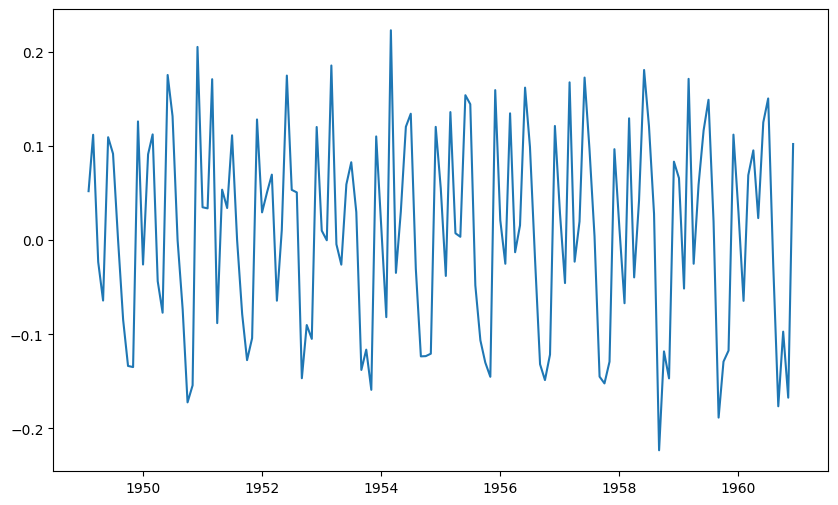

In [ ]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

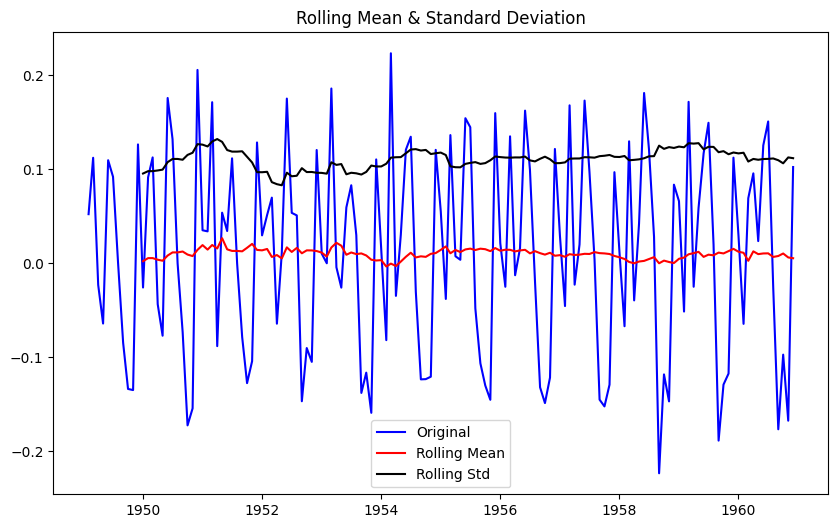

Results of Dickey Fuller Test
Test statistic               -2.717131
p-value                       0.071121
#Lags used                   14.000000
No. of observations used    128.000000
Critical value (1%)          -3.482501
Critical value (5%)          -2.884398
Critical value (10%)         -2.578960
dtype: float64


In [ ]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

* Rolling Mean, Output is quite flat.
* Null Hypothesis / ADF is rejected as the time series is stationary.
* There is no trend



* This clearly states that, the time series is not stationary. So, we require the moving average parameter in place.

* We know the value of d = 1

#### 8(a)-2 : Compute p & q values

* Autocorrelation Function (ACF) Graph : To find q value
* Partial Autocorrelation Function (PACF) Graph : To compute p value

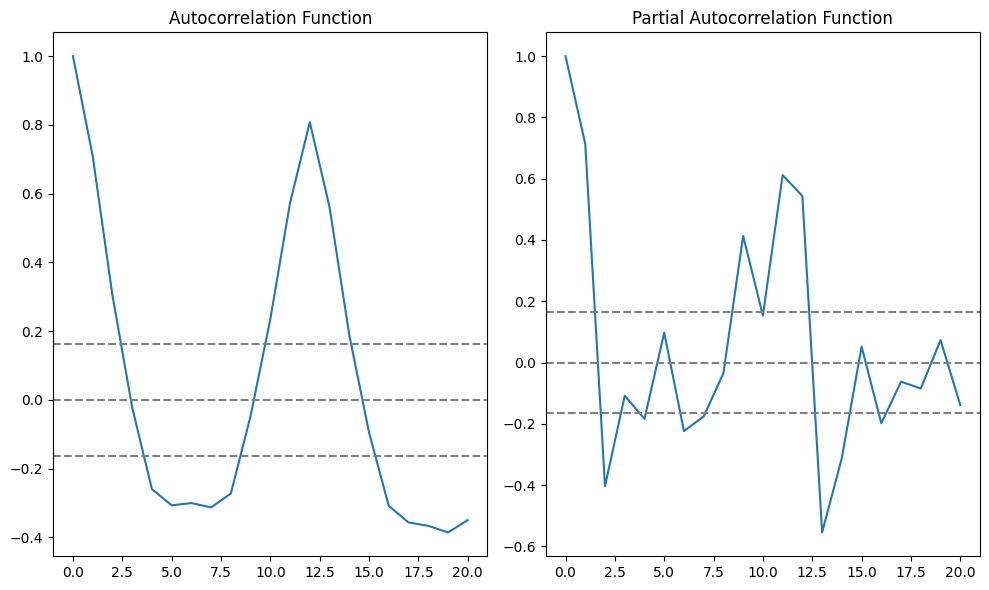

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(datasetLogScaleMinusMovingExponentialDecayAverage, nlags=20)
lag_pacf = pacf(datasetLogScaleMinusMovingExponentialDecayAverage,nlags=20, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.title("Autocorrelation Function")

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogScaleMinusMovingExponentialDecayAverage)), linestyle='--', color='gray')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

Check where the value drops to 0 for the first time in each of these graphs.
* In PACF graph : p value = 2 (around)
* In ACF graph : q value = 2 (around)

As we know the values of p, q, and d, Lets substitute the values in the ARIMA Model.

### 8(b) : Compute the Models

#### 8(b) - 1 : AR Model using ARIMA package

Month
1949-01-01    0.135054
1949-02-01    0.038938
1949-03-01    0.079813
1949-04-01    0.133092
1949-05-01    0.066765
                ...   
1960-08-01    0.348396
1960-09-01    0.250359
1960-10-01    0.083229
1960-11-01    0.057011
1960-12-01   -0.063780
Length: 144, dtype: float64
RSS: 1.087623
Plotting AR Model


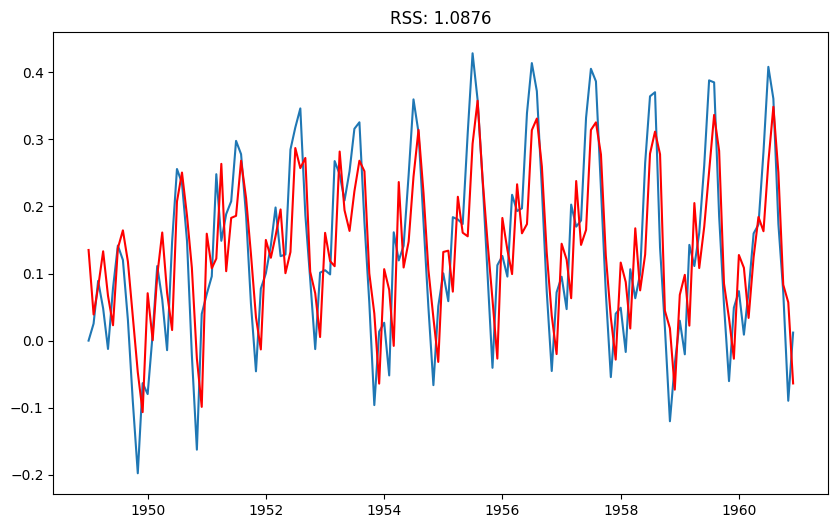

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# AR Model
model_0 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,0,0))
results_AR = model_0.fit()
print(results_AR.fittedvalues)
print('RSS: %f' % sum((results_AR.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['#Passengers'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['#Passengers'])**2))
print("Plotting AR Model")

#### 8(b) - 2 : MA Model using ARIMA package

Month
1949-01-01    0.134944
1949-02-01    0.052896
1949-03-01    0.093424
1949-04-01    0.124883
1949-05-01    0.062840
                ...   
1960-08-01    0.307995
1960-09-01    0.223302
1960-10-01    0.102931
1960-11-01    0.093384
1960-12-01   -0.042765
Length: 144, dtype: float64
RSS: 1.183446
Plotting Ma Model


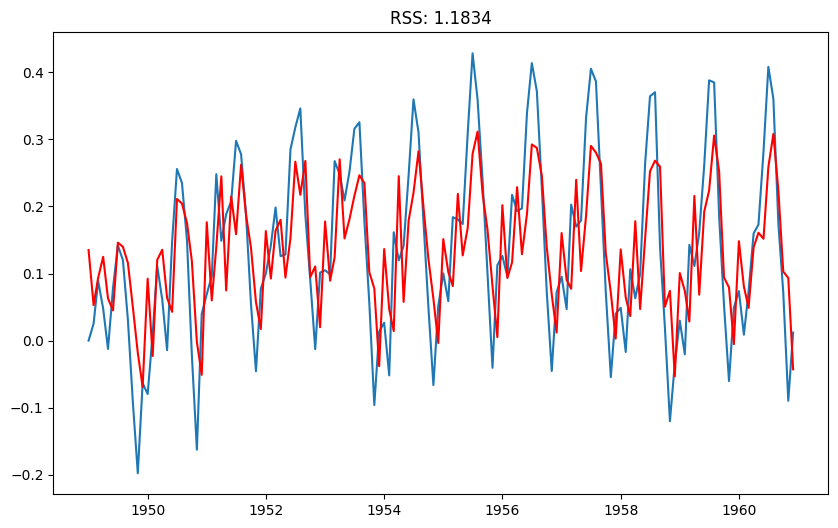

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# MA Model
model_02 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(0,0,2))
results_MA = model_02.fit()
print(results_MA.fittedvalues)
print('RSS: %f' % sum((results_MA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['#Passengers'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_MA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['#Passengers'])**2))
print("Plotting Ma Model")

 #### 8(b) - 3 : ARMA Model using ARIMA package

Month
1949-01-01    0.136231
1949-02-01    0.039413
1949-03-01    0.080971
1949-04-01    0.139449
1949-05-01    0.083601
                ...   
1960-08-01    0.346577
1960-09-01    0.252062
1960-10-01    0.078320
1960-11-01    0.034924
1960-12-01   -0.078883
Length: 144, dtype: float64
RSS: 1.051074
Plotting ARIMA Model


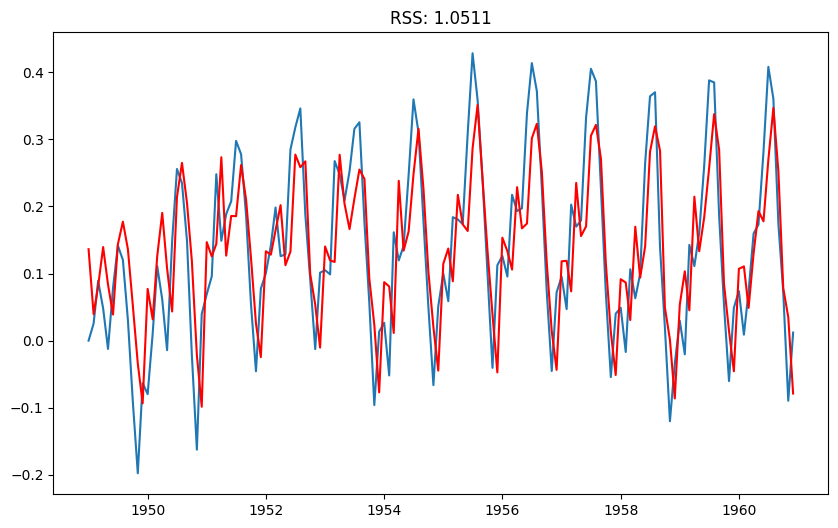

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# ARMA Model
model_03 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,0,2))
results_ARMA = model_03.fit()
print(results_ARMA.fittedvalues)
print('RSS: %f' % sum((results_ARMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['#Passengers'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['#Passengers'])**2))
print("Plotting ARIMA Model")

 #### 8(b) - 4 : ARIMA Model using ARIMA package

Month
1949-01-01    0.000000
1949-02-01    0.000000
1949-03-01    0.027467
1949-04-01    0.087487
1949-05-01    0.021716
                ...   
1960-08-01    0.335561
1960-09-01    0.270284
1960-10-01    0.120517
1960-11-01    0.091412
1960-12-01   -0.073304
Length: 144, dtype: float64
RSS: 1.132416
Plotting ARIMA Model


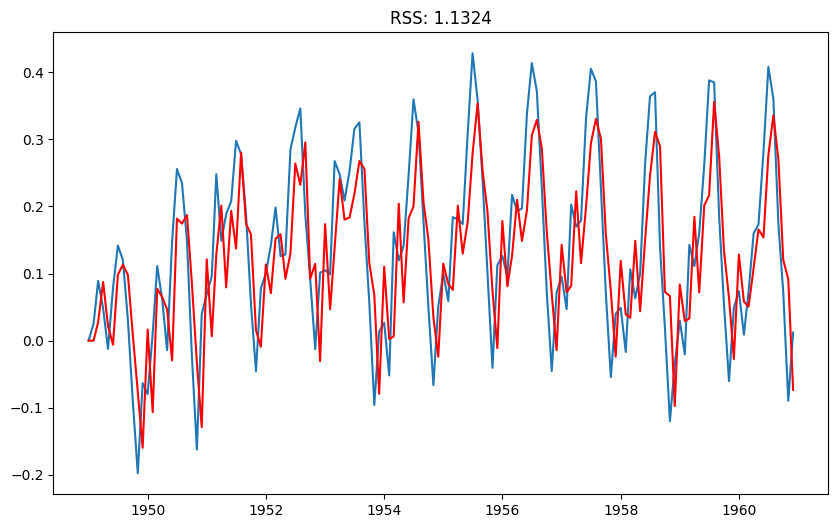

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model
model_1 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(2,1,2))
results_ARIMA = model_1.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['#Passengers'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['#Passengers'])**2))
print("Plotting ARIMA Model")

### 8(c) : Install the pmdarima package

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.0 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima
#ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fit=auto_arima(indexedDataset_logScale, trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-262.543, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-231.565, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-235.386, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-237.507, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-232.439, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.47 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-269.396, Time=1.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-241.608, Time=0.60 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-237.605, Time=0.40 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-268.496, Time=1.79 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-236.952, Time=0.42 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-269.822, Time=1.95 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-275.580, Time=2.84 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-248.753, Time=1.27 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(4, 1, 3)   Log Likelihood                 152.202
Date:                Mon, 18 Mar 2024   AIC                           -286.405
Time:                        03:22:51   BIC                           -259.739
Sample:                    01-01-1949   HQIC                          -275.569
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0126      0.002      6.329      0.000       0.009       0.016
ar.L1          0.2948      0.115      2.560      0.010       0.069       0.520
ar.L2         -0.3853      0.131     -2.948      0.003      -0.641      -0.129
ar.L3          0.4467      0.095      4.706      0.000       0.261       0.633
ar.L4         -0.5698      0.117     -4.855      0.000      -0.800      -0.340
ma.L1         -0.2951      0.158     -1.867      0.062      -0.605       0.015
ma.L2          0.1137      0.176      0.645      0.519      -0.232       0.459
ma.L3         -0.7562      0.159     -4.742      0.000      -1.069      -0.444
sigma2         0.0073      0.001      5.357      0.000       0.005       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 1.68
Prob(Q):                              0.75   Prob(JB):                         0.43
Heteroskedasticity (H):               1.27   Skew:                             0.17
Prob(H) (two-sided):                  0.42   Kurtosis:                         2.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Note : SARIMAX - ARIMA with seasonality

#### Fit the ARIMA Model

Month
1949-01-01    0.000000
1949-02-01    0.000000
1949-03-01    0.030471
1949-04-01    0.099557
1949-05-01    0.026291
                ...   
1960-08-01    0.326858
1960-09-01    0.308668
1960-10-01    0.057007
1960-11-01   -0.024051
1960-12-01   -0.031536
Length: 144, dtype: float64
RSS: 0.830352
Plotting ARIMA Model


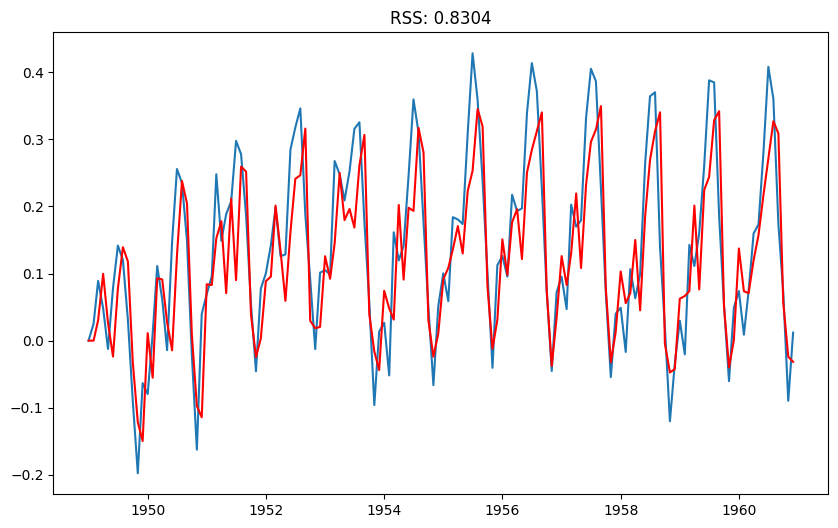

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model
model_2 = ARIMA(datasetLogScaleMinusMovingExponentialDecayAverage, order=(4,1,3))
results_ARIMA = model_2.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['#Passengers'])**2))
plt.plot(datasetLogScaleMinusMovingExponentialDecayAverage)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogScaleMinusMovingExponentialDecayAverage['#Passengers'])**2))
print("Plotting ARIMA Model")

### 8(d) : Prepare the fitted values for predictions

Month
1949-02-01    0.000000
1949-03-01    0.052186
1949-04-01    0.094273
1949-05-01    0.010312
1949-06-01    0.000704
                ...   
1960-08-01    0.029851
1960-09-01    0.019044
1960-10-01   -0.106983
1960-11-01   -0.049050
1960-12-01    0.075149
Length: 143, dtype: float64
RSS: 1.179768
Plotting ARIMA Model


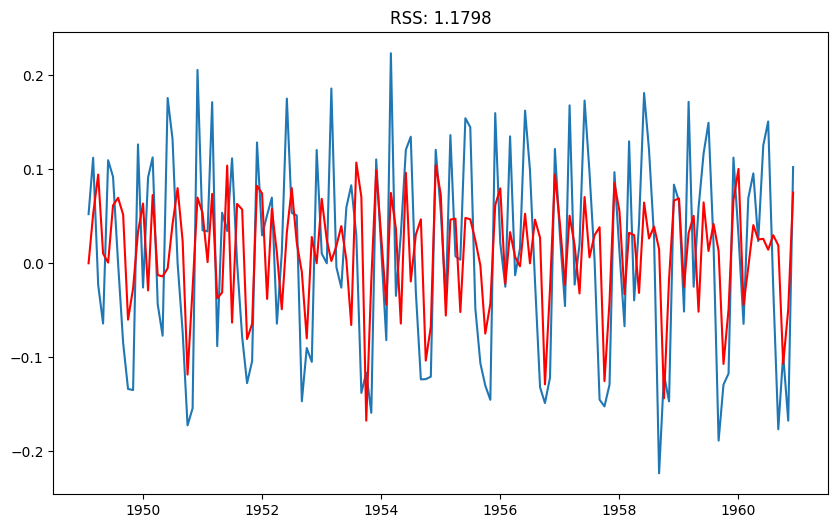

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# ARIMA Model with
model_3 = ARIMA(datasetLogDiffShifting, order=(4,1,3))
results_ARIMA = model_3.fit()
print(results_ARIMA.fittedvalues)
print('RSS: %f' % sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['#Passengers'])**2))
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['#Passengers'])**2))
print("Plotting ARIMA Model")

#### 8(d) - 1 : Convert the fitted values into a Series Format

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-02-01    0.000000
1949-03-01    0.052186
1949-04-01    0.094273
1949-05-01    0.010312
1949-06-01    0.000704
dtype: float64


#### 8(d)- 2 : Find the Cummulative Sum and find the predictions for the fitted values

In [ ]:
#Convert to Cummulative Sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-02-01    0.000000
1949-03-01    0.052186
1949-04-01    0.146459
1949-05-01    0.156771
1949-06-01    0.157475
dtype: float64


In [ ]:
predictiona_ARIMA_log = pd.Series(indexedDataset_logScale['#Passengers'].iloc[0],index = indexedDataset_logScale.index)
predictiona_ARIMA_log = predictiona_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictiona_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.770685
1949-04-01    4.864958
1949-05-01    4.875270
dtype: float64

#### 8(d)-3 :  Perform Exponential of the data to bring it to original form

In [ ]:
predictions_ARIMA = np.exp(predictiona_ARIMA_log)

#### 8(d)-4: Plot the predictions made by ARIMA Model over the original Data

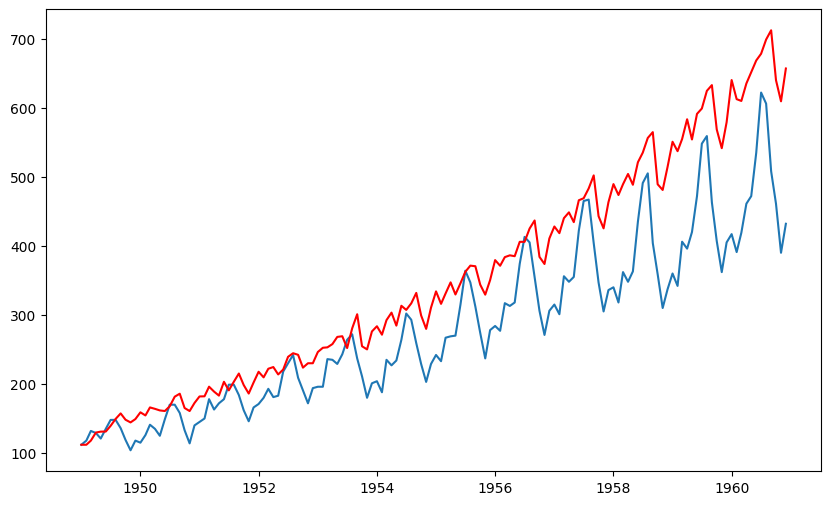

In [ ]:
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA, color='red')

NOte:  Here the ARIMA model capture the shape of the Time Series. Only the magnitude varies.

### 8(e) : Predictions for 2 years

In [ ]:
# Check the dimension of the dataset
indexedDataset_logScale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


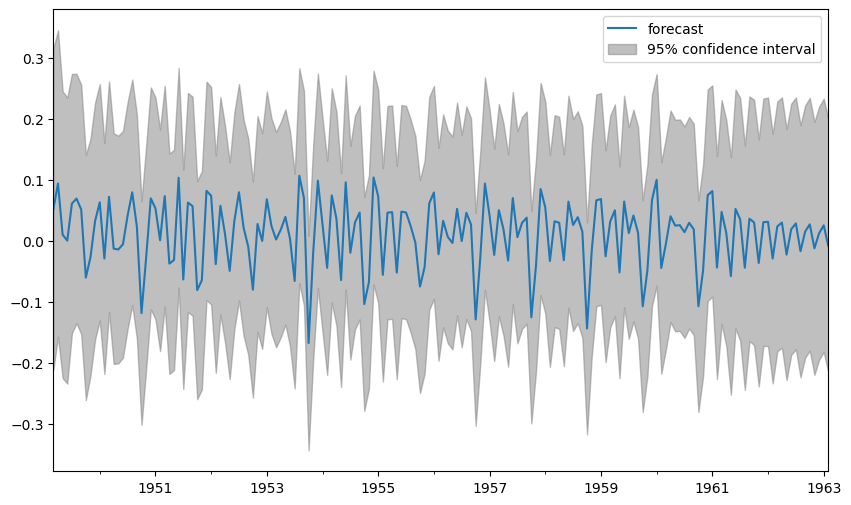

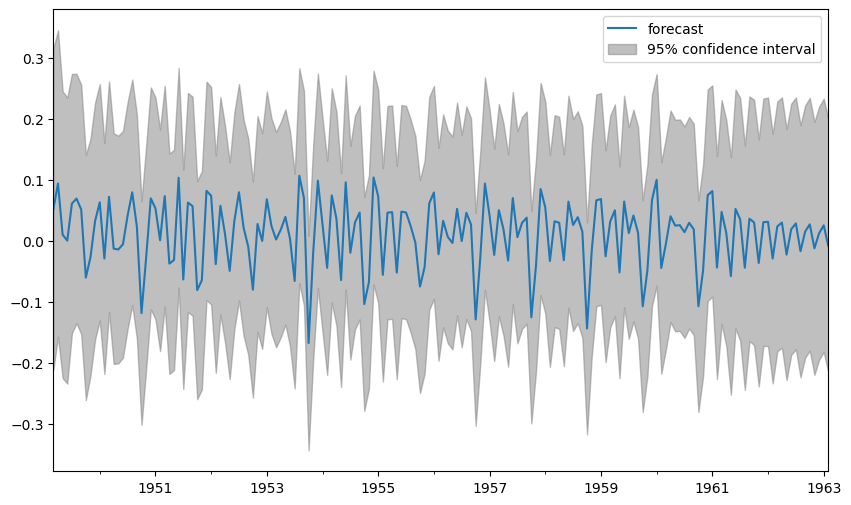

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
# We have 144 rows + 24 to be predictions
plot_predict(results_ARIMA,1,168)

In [ ]:
results_ARIMA.forecast(steps=24)

1961-01-01    0.081945
1961-02-01   -0.043547
1961-03-01    0.047674
1961-04-01    0.013577
1961-05-01   -0.057439
1961-06-01    0.052585
1961-07-01    0.035476
1961-08-01   -0.043805
1961-09-01    0.036580
1961-10-01    0.030474
1961-11-01   -0.035994
1961-12-01    0.030836
1962-01-01    0.031517
1962-02-01   -0.028765
1962-03-01    0.023960
1962-04-01    0.030213
1962-05-01   -0.022281
1962-06-01    0.019290
1962-07-01    0.028944
1962-08-01   -0.016780
1962-09-01    0.015474
1962-10-01    0.027353
1962-11-01   -0.012003
1962-12-01    0.012635
Freq: MS, Name: predicted_mean, dtype: float64

### Approach  - 2

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
print(datasetLogScaleMinusMovingExponentialDecayAverage.shape)
train=datasetLogScaleMinusMovingExponentialDecayAverage.iloc[:-60]
test=datasetLogScaleMinusMovingExponentialDecayAverage.iloc[-60:]
print(train.shape,test.shape)

(144, 1)
(84, 1) (60, 1)


In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,type='levels')
print(pred)

1955-12-01    5.536903
1956-01-01    5.683597
1956-02-01    5.660056
1956-03-01    5.732668
1956-04-01    5.702789
1956-05-01    5.625930
1956-06-01    5.682980
1956-07-01    5.667869
1956-08-01    5.612379
1956-09-01    5.684317
1956-10-01    5.678824
1956-11-01    5.623261
1956-12-01    5.688889
1957-01-01    5.680580
1957-02-01    5.622311
1957-03-01    5.685113
1957-04-01    5.679164
1957-05-01    5.622252
1957-06-01    5.683978
1957-07-01    5.680152
1957-08-01    5.623549
1957-09-01    5.683100
1957-10-01    5.680654
1957-11-01    5.624234
1957-12-01    5.681799
1958-01-01    5.680942
1958-02-01    5.624959
1958-03-01    5.680660
1958-04-01    5.681326
1958-05-01    5.625763
1958-06-01    5.679565
1958-07-01    5.681656
1958-08-01    5.626538
1958-09-01    5.678475
1958-10-01    5.681944
1958-11-01    5.627316
1958-12-01    5.677420
1959-01-01    5.682209
1959-02-01    5.628100
1959-03-01    5.676395
1959-04-01    5.682443
1959-05-01    5.628883
1959-06-01    5.675397
1959-07-01 